In [1]:
!pip install keras

You are using pip version 9.0.3, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [13]:
#import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
import os

# from keras.datasets import imdb
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import Conv2D,MaxPooling2D,Flatten,Conv1D
# from keras.preprocessing import sequence

from sklearn.model_selection import train_test_split


import json
import numpy as np
import pandas as pd
from sklearn import preprocessing
#import keras
#from keras.layers import Input,Dense,Lambda
#from keras.models import Model
import os
import numpy as np
#from keras.preprocessing import image as image_p
#from keras.applications.imagenet_utils import preprocess_input
#from keras.applications.vgg16 import VGG16
#import time
from sklearn.model_selection import train_test_split
#from keras.preprocessing.image import ImageDataGenerator
import pickle
import matplotlib.image as mpimg
#from keras.preprocessing import image
from  matplotlib import pyplot
#from keras.layers.normalization import BatchNormalization
import cv2
#import seaborn as sns
import random
from PIL import Image
from sklearn.utils import class_weight
#from keras.layers import Reshape
#import keras.backend as K
import numpy

In [14]:
!pip install imgaug

distributed 1.21.8 requires msgpack, which is not installed.
keras-preprocessing 1.0.1 has requirement keras>=2.1.6, but you'll have keras 2.1.3 which is incompatible.
keras-applications 1.0.2 has requirement keras>=2.1.6, but you'll have keras 2.1.3 which is incompatible.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [15]:
import xmltodict, json
anno = os.listdir('annotations')
import imgaug as ia
from imgaug import augmenters as iaa

In [39]:
file = "scale_show.xml"
with open(file,'r') as f:
    text = f.read()
    d = xmltodict.parse(text)
    path = "scale_show.jpg"
    print(path)
    bgr_img = cv2.imread(path)
    img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
    
    obj1 = d['annotation']['object'][0]
    bbox = obj1['bndbox']
    rescaled_xmin1 = 1.*float(bbox['xmin'])
    rescaled_xmax1 = 1.*float(bbox['xmax'])

    rescaled_ymin1 = 1.*float(bbox['ymin'])
    rescaled_ymax1 = 1.*float(bbox['ymax'])
    
    obj2 = d['annotation']['object'][1]
    bbox = obj2['bndbox']
    rescaled_xmin2 = 1.*float(bbox['xmin'])
    rescaled_xmax2 = 1.*float(bbox['xmax'])

    rescaled_ymin2 = 1.*float(bbox['ymin'])
    rescaled_ymax2 = 1.*float(bbox['ymax'])
    
    
    obj3 = d['annotation']['object'][2]
    bbox = obj3['bndbox']
    rescaled_xmin3 = 1.*float(bbox['xmin'])
    rescaled_xmax3 = 1.*float(bbox['xmax'])

    rescaled_ymin3 = 1.*float(bbox['ymin'])
    rescaled_ymax3 = 1.*float(bbox['ymax'])

scale_show.jpg


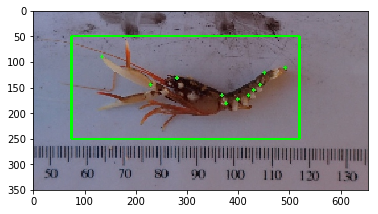

In [22]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
bgr_img = cv2.imread("image_augmentation_final.jpg")
img2 = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
img2 = cv2.rectangle(img2,(75,50),(520,250),(0,255,0),thickness=4)
plt.imshow(img2)
img2 = None

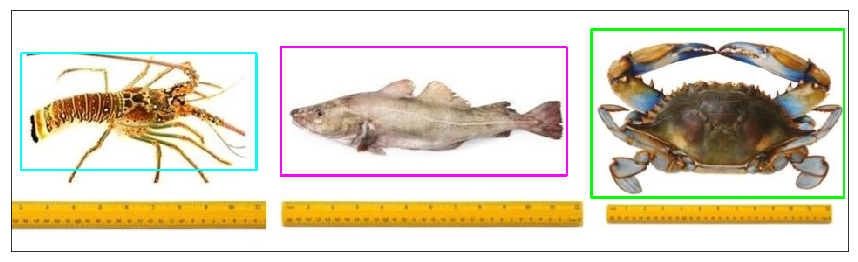

In [54]:
pt1 = (int(rescaled_xmin1),int(rescaled_ymin1))
pt2 = (int(rescaled_xmax1),int(rescaled_ymax1))
img = cv2.rectangle(img,pt1,pt2,(0,255,255),thickness=2)
pt1 = (int(rescaled_xmin2),int(rescaled_ymin2))
pt2 = (int(rescaled_xmax2),int(rescaled_ymax2))
img = cv2.rectangle(img,pt1,pt2,(255,0,255),thickness=2)
pt1 = (int(rescaled_xmin3),int(rescaled_ymin3))
pt2 = (int(rescaled_xmax3),int(rescaled_ymax3))
img = cv2.rectangle(img,pt1,pt2,(0,255,0),thickness=2)
pil_im = Image.fromarray(img)
plt.figure(figsize=(15,15))
plt.imshow(pil_im)
plt.xticks([])
plt.yticks([])
plt.savefig("scale_show_bb.jpg")

In [16]:
!readlink -f images/kusk fish/334. fish2701.jpg

/home/parmeet/thesis/fish-classification/images/kusk
/home/parmeet/thesis/fish-classification/fish2701.jpg


In [5]:
count_correct = 0
count_wrong = 0
labels =  []
images = []
bb = []
bboxes = []
image_sizes = []
for file in anno:
    #try:
    if(file.split(".")[-1]=='xml'):
        try:
            with open("annotations/"+file,'r') as f:
                text = f.read()
                d = xmltodict.parse(text)
                path = d['annotation']['path'].split("/home/parmeet/thesis/fish-classification/")[1]
                print(path)
                bgr_img = cv2.imread(path)
                img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img,(224,224))
                obj = d['annotation']['object'][0] if isinstance(d['annotation']['object'],list) else d['annotation']['object']
                bbox = obj['bndbox']
                rescaled_xmin = 1.*float(bbox['xmin'])/float(d['annotation']['size']['width'])
                rescaled_xmax = 1.*float(bbox['xmax'])/float(d['annotation']['size']['width'])

                rescaled_ymin = 1.*float(bbox['ymin'])/float(d['annotation']['size']['height'])
                rescaled_ymax = 1.*float(bbox['ymax'])/float(d['annotation']['size']['height'])
                bb.append(np.array([rescaled_xmin*224,rescaled_ymin*224,rescaled_xmax*224,rescaled_ymax*224]))
                
                bbs = ia.BoundingBoxesOnImage([
                    ia.BoundingBox(x1=rescaled_xmin*224, y1=rescaled_ymin*224, x2=rescaled_xmax*224, y2=rescaled_ymax*224)
                ], shape=img.shape)
                bboxes.append(bbs)
                labels.append(obj['name'])
                images.append(img)
                image_sizes.append((float(d['annotation']['size']['width']),float(d['annotation']['size']['height'])))
                count_correct += 1
        except Exception as ex:
            print(ex)
            count_wrong += 1

images/out of water halibut/31. img-0559_1 (1).jpg
images/out of water halibut/222. 8ec15d3287eb708be40b4c282a180309.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/cod caught/156. photo.jpg
images/caught lobster/lobster_cropped/588. b97747233z.120171212164401000gncj8d0p.11.jpg
images/caught lobster/lobster_cropped/615. ax011_23ce_9-600x45011.jpg
images/caught lobster/lobster_cropped/lobster-screenshot10.png
images/fresh caught jonah crab/gv_20130709_biv0104_130709942.jpg
images/out of water halibut/125. 170901(01) (1).jpg
images/out of water halibut/494. salmon-fishing-tofino-bc.jpg
images/out of water halibut/625. image2_lite2.jpg
images/out of water halibut/32. halibutkingsalmoncombo (2).jpg
images/kusk fish/315. 634_cusk-eel-_ophidion-marginatum_.jpg
images/caught lobster/206. videoblocks-fresh-caught-lobster-tails-at-cleaning-table_b-z4nxplb_thumbnail-small05.jpg
OpenCV(3.4.1) /io/opencv/modules/imgp

images/caught lobster/lobster_cropped/cd7b212f-c69d-49e1-a587-e8910ed185c8.jpg
images/caught lobster/lobster_cropped/CalicoLob3.jpg
images/out of water halibut/514. big-catch-at-canadian-fishing-vacations-and-charters-1030x1030.jpg
images/caught lobster/lobster_cropped/395. common_lobster_homarus_gammarus_20-09-14_4.jpg
images/fresh caught jonah crab/43. 200908311112344316_0.jpg
images/out of water halibut/437. halibut-01.jpg
images/cod caught/99. sailfish-canal-2-4-800x600.jpg
images/out of water halibut/181. 01fred0807.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/out of water halibut/174. fishing_7.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/caught lobster/lobster_cropped/126. 539w.jpg
images/out of water halibut/266. img_3676.jpg
images/fresh caught jonah crab/red_rock_crab_300.jpg
images/kusk fish/384. (brosme%20b

images/fresh caught jonah crab/rock-crabs-edible-crabs-cancridae-sitting-on-blue-mussels-netherlands-CNRJ6G.jpg
images/cod caught/458. torsk?t=1533062727&.jpg
images/caught lobster/lobster_cropped/istock_000004720195small.jpg
images/out of water halibut/158. hqdefault (3).jpg
images/kusk fish/353. 704_7231.jpg
images/out of water halibut/207. lots-of-fish-photo (1).jpg
images/cod caught/266. zeb-tonkin-ari-this-fish-was-caught-were-the-semi-loads-of-timber-was-placed-1024x768.jpg
images/cod caught/680. bdb2515c45cd57546ce686d6f046f2dc_booth%20-%20cold%20cod%203.jpg
images/cod caught/116. dsc_0237.jpg
images/out of water halibut/257. 940x940.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/cod caught/510. 13000257_10206113109166988_8154514334199154716_n-750x658.jpg
images/kusk fish/307. 70256688-fisherman-is-holding-nice-fish.jpg
images/cod caught/788. cinf0410eastwest.jpg
images/caught lobster/lobster_crop

images/caught lobster/lobster_cropped/MaineLobster1.jpg
images/fresh caught jonah crab/5427000190_058ecbd1a3_b.jpg
images/caught lobster/150. 001.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/caught lobster/lobster_cropped/371. 2013-08-30t211924z_1504837916_gm1e98v0bkt01_rtrmadp_3_usa-lobster.jpg
images/cod caught/556. image-150.jpeg
images/caught lobster/lobster_cropped/451. 325025_calico-lobster.jpeg-09ac2_1.jpg
images/cod caught/706. r0_13_1125_646_w1200_h678_fmax.jpg
images/caught lobster/lobster_cropped/_070929_33.jpg
images/kusk fish/29. cusk1.jpg
images/out of water halibut/323. aaron.jpg
images/caught lobster/lobster_cropped/dsc09301.jpg
images/caught lobster/228. cover_2211348b.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/cod caught/268. fishing-scotland-2.jpg
images/kusk fish/234. al0403-1167.jpg
images/caught

images/out of water halibut/14. maxresdefault.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/out of water halibut/534. march1.png
images/out of water halibut/230. 2018-halibut-update2-600x555.jpg
images/out of water halibut/334. 300px-fishermen_with_their_halibut (1).jpg
images/caught lobster/100. wild-caught-lobster.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/cod caught/726. capecod06064.jpg
images/caught lobster/lobster_cropped/Live-Borston-Lobste-Maine-Lobster.jpg
images/fresh caught jonah crab/214. centollo+-+mariciano+-+spider+crab+-+guide+to+seafood+in+popotla+mexico+%7c+bites+%26+bourbon.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/fresh caught jonah crab/158. 1200px-portunus_pelagicus_male.jpg
images/out of water halibut/39. dsc

images/out of water halibut/66. img-20180802-98d814f4.jpeg
images/out of water halibut/639. img_8007.jpg
images/fresh caught jonah crab/213. 20151111__tasteoff-11221.jpg
images/out of water halibut/311. fishing%20salt%20water%20fishing%20tim%20ross%20with%20clients%20and%20fish.jpg
images/cod caught/206. eric_dahlberg_27kg_147cm_lowres.jpg
images/fresh caught jonah crab/565. stonecrab3.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/fresh caught jonah crab/green-shore-crab-carcinus-maenas-infected-with-parasitic-barnacle-EHRDD2.jpg
images/fresh caught jonah crab/beach-008.jpg
images/caught lobster/lobster_cropped/148. 06.20.12news-flickr-multicolored-lobsters-edit-580x326_1.jpg
images/caught lobster/lobster_cropped/476. lobster-frontoptionsxxlf5_2.jpg
images/fresh caught jonah crab/250. marine-inv_crustaceans_crabs_other-crabs_red-rock-crab.jpg
images/fresh caught jonah crab/530. oc_crab141271740154345b59

images/cod caught/317. pipe_jig_ling_jackhall.jpg
images/out of water halibut/503. 1358700_27ef5ca234d7c4436b8f9bd8ddd07c17.jpg
images/out of water halibut/81. 08-08-2010-many-fine-fish-plus-a-200-lbs-halibut.jpg
images/out of water halibut/193. 146cm%20halibut%20havoysund%2020174.jpg
images/cod caught/138. marica%2beriksson%2bfemale%2breocrd%2bcod%2bcods%2batlantic%2bsoroya%2bisland%2bnorth%2bnorway%2bhige%2bworld%2bgiant%2bbig%2bbiggest%2bever%2bcaught%2blure%2bjig%2bwinter%2bfrozen.jpg
images/out of water halibut/268. nd4_3962 (1).jpg
images/fresh caught jonah crab/487. how-to-cook-stone-crab-claws-before-cooking-1.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/fresh caught jonah crab/651. how-to-buy-clean-and-cook-crabs-4-methods-plus-recipes.jpg
images/cod caught/722. image-102.jpeg
images/out of water halibut/129. halibut_03.jpg
images/caught lobster/lobster_cropped/378. lobster-4_2.jpg
images/cod 

images/fresh caught jonah crab/1. freshly-caught-and-landed-brown-crab-latin-cancer-pagurus-also-known-d3h6ye.jpg
images/cod caught/140. 49242_george-toller-cod_jan12.jpg
images/cod caught/768. 62_31%20brooklyn%20vi%20cod%20%20and%20pollock%20aug%2024%202015.jpg
images/out of water halibut/654. dscn0216 (1).jpg
images/cod caught/715. mulawa-murry-cod-1024x576.jpg
images/caught lobster/lobster_cropped/45. lobster-article-color%20and%20b%20%20w-%202%20col.jpeg
images/cod caught/466. 9-1846238-fhb170513fishing1_fct995x612x30x44_ct677x380.jpg
images/caught lobster/lobster_cropped/north-american-lobster-3.jpg
images/cod caught/222. fceff746caf7dd1f2a57d12b82308054_mckennakayak516_1.jpg
images/caught lobster/lobster_cropped/238. jumbo-lobster-2663080_large.jpg
images/caught lobster/lobster_cropped/live_lobster_400g_1.jpg
images/fresh caught jonah crab/356. pileofclaws.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

im

images/fresh caught jonah crab/677. stonecrab1.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/kusk fish/36. 6-22-04a.jpg
images/cod caught/180. 1415991399.jpg
images/out of water halibut/457. home-slide-1.jpg
images/out of water halibut/644. 6535812.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/fresh caught jonah crab/Cancer-irroratus_1170.jpg
images/out of water halibut/490. sean-halibut-2012.jpg
images/cod caught/369. dsc_01022.jpg
images/out of water halibut/523. hanging-halibut-wild-pacific-charters-ucluelet-bc-1030x579.jpg
images/cod caught/60. uk-cod-record.jpg
images/caught lobster/lobster_cropped/569. 10094201_h13553127-600x80012.jpg
images/cod caught/587. skipper%20cod.jpg
images/cod caught/442. image-134.jpeg
images/caught lobster/lobster_cropped/201. zbjrbtu_2.jpg
images/fresh caught jonah crab/563. dungeness-c

images/fresh caught jonah crab/SS2406903.jpg
images/fresh caught jonah crab/5016757759_1d0794f4f7_b.jpg
images/cod caught/182. a2b63cfbbae0e88cf540afce46ff16bd?width=1024.jpg
images/cod caught/509. cod%20tagging%20poster%20dec.jpg
images/cod caught/757. r0_0_800_800_w1200_h678_fmax.jpg
images/out of water halibut/39. dscn0543-e1326587536329-1024x665 (2).jpg
images/out of water halibut/18. large05 (6).jpg
images/caught lobster/lobster_cropped/69. stock-photo-freshly-caught-lobsters-on-the-seafood-market-fisherman-holding-some-fresh-lobster-in-market-780686575.jpg
images/kusk fish/102. e515b511d6c1d45a8a832d52ab7efedf.jpg
images/out of water halibut/578. dsc_0324-copy.jpg
images/cod caught/764. luke%20porch%20550_29568520-6090-11e3-bfd8005056a302e6.jpg
images/fresh caught jonah crab/297. gettyimages-6801758101-5a0c9b6a845b34003b7cae08.jpg
images/kusk fish/P1010260-1024x829.jpg
images/caught lobster/lobster_cropped/438. yellow-lobster-3098738_large.jpeg
images/out of water halibut/40. hal

images/kusk fish/337. coolest-picture-of-cod-fish-haddock-fish-seafood-ocean-life-pinterest-picture-of-cod-fish.jpg
images/fresh caught jonah crab/crabscreenshot21.png
images/caught lobster/lobster_cropped/210. 103142315_81.jpg
images/caught lobster/lobster_cropped/lobster300x205.jpg
images/cod caught/197. tfy8trro2fk01.jpg
images/out of water halibut/27. 05-31-15-carson-grant.jpg
images/cod caught/358. steve%20harwood%20cod%206lb%208oz%20bexington%2030-12-'11_small.jpg
images/fresh caught jonah crab/Carcinus_maenas_ID_ODFW.jpg
images/out of water halibut/376. halibut-bc (2).jpg
images/out of water halibut/42. img_1208 (2).jpg
images/fresh caught jonah crab/depositphotos_90867470-stock-photo-carcinus-maenas-edible-alive-crab.jpg
images/cod caught/19. image.jpg
images/fresh caught jonah crab/578. snow-crab-cocktail-claws_lrg.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/fresh caught jonah crab/464. 30258

images/caught lobster/110. freshly-caught-maine-lobster-container-47354415.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/caught lobster/lobster_cropped/lobster2.jpg
images/out of water halibut/413. slide8 (5).jpg
images/caught lobster/lobster_cropped/227. 23211791-wild-caught-lobster-on-the-restaurant-table-in-maine.jpg
images/out of water halibut/318. alaska_salmon_jumping_out_of_water.jpg
images/kusk fish/151. maxresdefault.jpg
images/caught lobster/lobster_cropped/531. 1210569_20160615_lobsterboat_0068.jpg
images/out of water halibut/849. fishingpages-halibut1 (2).jpg
images/fresh caught jonah crab/3569584344_455efd0f3d.jpg
images/kusk fish/413. cusk.jpg
images/out of water halibut/37. oldfield-08-035-e1326587761866-587x1024.jpg
images/out of water halibut/214. homer-ocean-charters2006 (3).jpg
images/fresh caught jonah crab/609. 9094237.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115

images/kusk fish/spectrunculus_crassa.jpg
images/kusk fish/176. 3105_4287.jpg
images/out of water halibut/763. 35106502560_2d84b9c7c5.jpg
images/cod caught/718. double-cod-bite-two-fresh-caught-fishes-water-surface-53735883.jpg
images/fresh caught jonah crab/504. jonah-crab-850x478.png
images/caught lobster/lobster_cropped/raw-lobster-260nw-169647149.jpg
images/kusk fish/309. ss2807336.jpg
images/caught lobster/lobster_cropped/142. aki-530-640x359_1.jpg
images/kusk fish/cusk-eel0.jpg
images/cod caught/602. cxeygjguoaeh1zh.jpg
images/kusk fish/277. fishing-01.jpg
images/out of water halibut/701. 1130_img_1509-292x200 (4).jpg
images/caught lobster/lobster_cropped/309. 2687c3a2edc361f8374b4fc3027688d5--live-maine-lobster-tanks.jpg
images/fresh caught jonah crab/394. crab.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/out of water halibut/112. 215.8-candice-janke-fairbanks-ak-aleashia-july-18.jpg
images/cod 

images/cod caught/522. maycod-019_thumb.jpg
images/kusk fish/EpetriodFreddyiNOAA.jpg
images/out of water halibut/197. joannfishing_t-1.jpg
images/kusk fish/427. gebla_u1.jpg
images/cod caught/608. image.jpg
images/out of water halibut/360. day-3-toping-off-the (1).jpg
images/fresh caught jonah crab/153. dungeness%20crab%20good_fetxb4jvq06widq9dfnr-947x441.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/caught lobster/lobster_cropped/296. lobster-season-2012-opens-5-657x493_1.jpg
images/out of water halibut/411. 5421029112_3d93d0619ae09fbd869ab85d82be58cf (1).jpg
images/cod caught/67. 24-zeevissen-slow-jigging-(small)_137.jpg
images/out of water halibut/309. reports-june2016-01.jpg
images/caught lobster/lobster_cropped/113. image-21_1.jpg
images/kusk fish/15. cusk-craig-borgeson-lg.jpg
images/kusk fish/380. 3822289743_a8063f5aea_b.jpg
images/fresh caught jonah crab/161. 3231286.jpg
images/out of water hali

images/out of water halibut/654. dscn0216 (3).jpg
images/cod caught/200. me-and-the-cod-i-caught.jpg
images/fresh caught jonah crab/263. redcrabpainting.jpg
images/fresh caught jonah crab/588. jonah-crab-claws-fs-300x169.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/fresh caught jonah crab/c1ccd07dc1fa2ec8d85aff8b83810b5a--crab-feast-blue-crabs.jpg
images/caught lobster/lobster_cropped/30. e3759c24-d382-455f-8ec0-25f625dad7da-large16x9_lobsterboyz_3.jpg
images/cod caught/683. man-holding-a-cod-fish-caught-on-stock-images__2272926.jpg
images/out of water halibut/413. slide8 (2).jpg
images/fresh caught jonah crab/310. lopholithodes_foraminatus_adult-will_duguid.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/fresh caught jonah crab/362. 1023983.jpg
images/cod caught/368. blackcod-aka-sablefish.jpg
images/fresh caught jonah c

images/out of water halibut/821. halibut-ucluelet-bc-wild-pacific-charters-1030x773 (1).jpg
images/out of water halibut/775. halibut+catch (1).jpg
images/caught lobster/lobster_cropped/2. maxresdefault_3.jpg
images/fresh caught jonah crab/708. cancantenn.gif
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/kusk fish/145. cusk-ellacoya-lg.jpg
images/fresh caught jonah crab/142. rawimage.jpg
images/out of water halibut/473. halibut_06.jpg
images/out of water halibut/385. 20180723_155329%20-%20copy_zpszasnjvgr.jpg
images/out of water halibut/214. homer-ocean-charters2006 (1).jpg
images/fresh caught jonah crab/543. aid600310-v4-728px-eat-a-maryland-blue-crab-step-14.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/out of water halibut/34. westporthalibut.jpg
images/caught lobster/lobster_cropped/342. kycze8z.jpg
images/out of water ha

float division by zero
images/cod caught/46. 4629628247.jpg
images/fresh caught jonah crab/266. granceola_maya-squinado.jpg
images/caught lobster/188. d082aa19-fb62-4606-8ea6-747d52d3cd73-large16x9_lobster.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/out of water halibut/604. 180509(01) (2).jpg
images/out of water halibut/407. halibut21.png
images/cod caught/11. article-2323718-19c0e44a000005dc-314_634x406.jpg
images/cod caught/485. cod-caught-october-25-2015.jpg
images/fresh caught jonah crab/red-rock-crab-cancer-productus-in-seaweed-on-beach-at-savary-island-B66MTF.jpg
images/out of water halibut/307. 2017_july-7-john-halibut--1024x851 (1).jpg
images/out of water halibut/186. world-class-halibut-fishing.jpg
images/caught lobster/lobster_cropped/196. 412886_478545-2015-0723-lobster-2_1.jpg
images/caught lobster/lobster_cropped/live-lobster_large.jpg
images/fresh caught jonah crab/370. crab-interstitia

images/kusk fish/410. dsc_09141-640x425.jpg
images/fresh caught jonah crab/13.jpg
images/caught lobster/lobster_cropped/lobster_top_regular.png
images/caught lobster/lobster_cropped/NewShellHardShellBlog_1140x642_acf_cropped.jpg
images/fresh caught jonah crab/160816_Crab3-L.jpg
images/fresh caught jonah crab/IMG_5224.jpg
images/fresh caught jonah crab/283. 1306157634034.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/caught lobster/lobster_cropped/192. yellow-lobster_1.jpg
images/out of water halibut/89. eclipse%2b8-31 (1).jpg
images/caught lobster/lobster_cropped/584. four_clawed_lobster_124202997.jpg
images/fresh caught jonah crab/BxA7Sn9CIAEUQFU.jpg
images/out of water halibut/136. stormwildeyegiantjiggingshad1.jpg
images/out of water halibut/604. 180509(01) (1).jpg
images/cod caught/549. cod2-435x650.jpg
images/fresh caught jonah crab/250px-Rock_crab_on_tunicate_colony.jpg
images/out of water halibut/

images/out of water halibut/333. olsen-gangweb-600x450 (2).jpg
images/caught lobster/lobster_cropped/561. charhuntsmanlobster6.jpg
images/fresh caught jonah crab/DSCN0964.JPG
images/out of water halibut/445. halibut_fisher.jpg
images/caught lobster/lobster_cropped/4. lobster_04_2.jpg
images/caught lobster/lobster_cropped/39068_homarus-americanus---american-lobster.jpg
images/kusk fish/419. haddock-1-700x400.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/fresh caught jonah crab/atlantic-rock-crab-andrew-j-martinez0.jpg
images/cod caught/354. a069af0a89cfc3031a0572edaf0fa599_mack614_2.jpg
images/out of water halibut/376. halibut-bc.jpg
images/cod caught/784. 08-20-08-russ%20with%20a%20large%20cod%20caught%20aboard%20the%20relentless-75-4.jpg
images/out of water halibut/374. geo-losangeles.jpg
images/out of water halibut/304. halibut5.jpg
images/out of water halibut/195. 3702047.jpg
images/fresh caught jona

images/caught lobster/lobster_cropped/Lobster-Canadian_4f8ca1fa-7c1d-4a57-b76b-8d7055bcdc7f_900x.jpg
images/caught lobster/lobster_cropped/320. the-largest-lobster-ever-caught.jpg
images/caught lobster/lobster_cropped/347. albino-lobsters_2.jpg
images/fresh caught jonah crab/189. picking-jonah-crab-meat-at-allswell-%c2%a9-morgan-ione-yeager.jpg
images/out of water halibut/54. halibut-fishing-british-columbia.jpg
images/out of water halibut/333. olsen-gangweb-600x450.jpg
images/fresh caught jonah crab/crab-cancer-pagarus-on-seaweed-covered-rock-KRT7BA.jpg
images/out of water halibut/297. img_grnling.jpg
images/fresh caught jonah crab/353. 288c5f7200000578-0-aquarist_martyn_chandler_carefully_handles_the_mammoth_crab_brou-m-26_1431341874391.jpg
images/kusk fish/170. 6fd89b14117bfe1c.jpg
images/cod caught/770. freshly-caught-cod-fish-black-plastic-crate-other-catches-freshly-caught-cod-fish-black-plastic-crate-other-116622056.jpg
images/out of water halibut/236. img_0385 (5).jpg
images/co

images/caught lobster/lobster_cropped/steaming-lobster2.jpg
images/kusk fish/164. record-breaking-freshwater-cod-burbot-eelpout-cusk-landed-in-ontario-3.jpg
images/out of water halibut/224. gmiller-hali (3).jpg
images/cod caught/288. 4lb%2520bass.jpg
images/kusk fish/202. cusk-brosme.gif
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/kusk fish/404. 089.jpg
images/out of water halibut/549. nealhalibut.jpg
images/out of water halibut/729. got-halibut-wild-pacific-charters-ucluelet-bc-1030x579 (3).jpg
images/fresh caught jonah crab/441. ahr0cdovl3d3dy5saxzlc2npzw5jzs5jb20vaw1hz2vzl2kvmdawlza1my8yndivb3jpz2luywwvy3jhynmtbwf0aw5nlmpwzw==.jpg
images/out of water halibut/274. salmon-fishing-201-226x300.jpg
images/kusk fish/64. img_8201.jpg
images/fresh caught jonah crab/279. 20141218_133526.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

ima

images/out of water halibut/466. index.11.jpg
images/caught lobster/158. dsd_1271-santacruzisland-puertoayora-fishmarket-spinylobster-755x500.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/fresh caught jonah crab/495. buey_de_mar.jpg
images/kusk fish/stock-vector-fish-vector-cartoon-illustration-t-shirt-design-for-kids-with-aquatic-animal-cusk-eel-fish-isolated-718705012.jpg
images/fresh caught jonah crab/139. a_image00702.jpg
images/kusk fish/67. img_0465-e1474380458143.jpg
images/cod caught/772. 07aaed6b9cfef85bc51ef5973eb8334d_mackenzie0713_1.jpg
images/kusk fish/cusk-eel_steve-murvine.jpg
images/fresh caught jonah crab/mitten-crab2.jpg
images/cod caught/33. image-41.jpeg
images/cod caught/414. kims-cod.jpg
images/out of water halibut/243. 180331(01) (2).jpg
images/cod caught/712. merluzzo+atlantic+cod+big+huge+world+record+igfa+gigante+pesce+biggest+fishes+fish+of+the+world+pesce+enorme+gigante+big+f

images/fresh caught jonah crab/414. marine-inv_crustaceans_crabs_other-crabs_graceful-kelp-crab.jpg
images/out of water halibut/212. img-20180728-bf13d68e.jpeg
images/fresh caught jonah crab/greencrab_0.jpg
images/caught lobster/lobster_cropped/265. nc_new_lobster2_140827.jpg
images/out of water halibut/299. halibut-225x300.jpg
images/cod caught/115. b881165160z1_20180108145842_000g6mua5o92-0-shdxao136s6vsn8ekp2_fct810x602x110x28_ct677x380.jpg
images/fresh caught jonah crab/71. ov_e4cwinl5pjz5ngn8gyxfc1fqatv4wdjjzllsmnp9g50tqfzyejoq8wfhlpkhuztpcniagsehwd29taqf6siqc2oqxmbmqz5d8d3pks813ook55xhavp3xfw.jpg
images/cod caught/170. one-of-many-cod-caught-off-reykjavik-photo_13755388-770tall.jpg
images/cod caught/153. sport+fishing+october+2010+002.jpg
images/caught lobster/lobster_cropped/486. lobste10.jpg
images/kusk fish/210. julyshelleycusk.jpg
images/fresh caught jonah crab/90110455.jpg
images/out of water halibut/4. ladies-group.jpg
images/out of water halibut/311. fishing%20salt%20water

images/caught lobster/13. translucent_lobster-1.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/out of water halibut/333. olsen-gangweb-600x450 (1).jpg
images/fresh caught jonah crab/400px-Cancer_productus.jpg
images/fresh caught jonah crab/152. crab-rock.jpg
images/cod caught/192. 2017moruede6kg.jpg
images/caught lobster/lobster_cropped/topic-98-notes-image2.jpg
images/cod caught/782. marlin-41.jpg
images/out of water halibut/149. 20130727_0004.jpg
images/cod caught/194. torsk19kg.jpg
images/out of water halibut/527. ?format=750w.jpg
images/kusk fish/475. burbot-lawyer-lota-lota-lake-lugano-ticino-switzerland-bchd4c.jpg
images/out of water halibut/52. img_0172.jpeg
images/kusk fish/conger2.jpg
images/out of water halibut/80. 0614121214-1 (2).jpg
images/cod caught/34. brwalu4qd34cdwvy3dskapfqm4.jpg
images/fresh caught jonah crab/1280-501674204-crab-from-the-bottom.jpg
images/cod caught/223. emma-teal-lauk

images/out of water halibut/701. 1130_img_1509-292x200 (2).jpg
images/caught lobster/lobster_cropped/201. zbjrbtu_1.jpg
images/cod caught/338. 30lbmikebess.jpg
images/caught lobster/232. 10004141_h7975727-600x427.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/kusk fish/Spectrunculus_grandis.jpg
images/out of water halibut/59. briggs-hali.jpg
images/out of water halibut/11. 1069822_10151500044372307_966471122_n.jpg
images/fresh caught jonah crab/240_F_199119322_jjkRBWRMv2StSyII9J1ZE4jjgHfPJnft.jpg
images/kusk fish/211. crested-cusk-eel-ophidion-welshi.jpg
images/fresh caught jonah crab/Red20Rock20Crabwtmk.jpg
images/cod caught/323. paul_klien_108_cod.jpg
images/out of water halibut/358. img953404.jpg
images/out of water halibut/44. p1030373 (1).jpg
images/cod caught/12. image-44.jpeg
images/fresh caught jonah crab/673. 87727279_xs.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-

images/cod caught/763. ri-tautog-black-sea-bass-and-cod.jpg
images/fresh caught jonah crab/CarcinusMaenusIainMcGaw.jpg
images/out of water halibut/172. norway-halibut-fishing.jpg
images/out of water halibut/71. beautiful-day-out-on (1).jpg
images/caught lobster/lobster_cropped/atlantic-lobster-CFDBNE.jpg
images/out of water halibut/738. hippoglossus-hippoglossus-a-19595_0.jpg
images/kusk fish/F178-Basketweave-Cusk-Eel-1.jpg
images/caught lobster/lobster_cropped/four-clawed-lobster.jpg
images/caught lobster/155. person+holding+freshly+caught+lobster?format=500w.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/fresh caught jonah crab/3231345.jpg
images/kusk fish/385. _73274797_73274796.jpg
images/fresh caught jonah crab/south-carolina-blue-crabs-S1E1MG.jpg
images/cod caught/80. hybrid%201_1bac5ff0-eef4-11e4-a9ee02ddb0048605.png
images/out of water halibut/809. 35168634300_8653e2c9ce.jpg
images/caught lobster

images/caught lobster/lobster_cropped/378. lobster-4_1.jpg
images/cod caught/36. black-cod-sablefish-58b8ea473df78c353c297e37.jpg
images/caught lobster/lobster_cropped/44. giant-pacific-spiny-lobster-413512_2.jpg
images/caught lobster/lobster_cropped/87. lobster.jpg
images/fresh caught jonah crab/336. bushel_of_crabs.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/caught lobster/213. flhonduras_mikael%20castro-honduras-tim-mc-6379.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/kusk fish/Cusk-eel-2.jpg
images/out of water halibut/262. forrests_103lb.jpg
images/out of water halibut/679. lg_fishing_group (2).jpg
images/caught lobster/lobster_cropped/Lobster_HD_600_lq_0002.jpg
images/out of water halibut/105. slider2.jpg
images/out of water halibut/333. olsen-gangweb-600x450 (5).jpg
images/caught lobster/lobster_cropped/14. rar

images/cod caught/83. skylark-boat-fishing.jpg
images/fresh caught jonah crab/640. 107453002.png
images/kusk fish/460. medium.jpg
images/kusk fish/182. f183-specklefin-cusk-eel-5.jpg
images/out of water halibut/99. img_7457_0.jpg
images/cod caught/574. ae74363fd57773b1da20e797ecbfebb8_mack813_1.jpg
images/cod caught/127. fishing-iceland-sudavik-boat-0004.jpg
images/cod caught/322. img_1370-640x480.jpg
images/kusk fish/damage-hires.jpg
images/out of water halibut/155. johnhalibutcutout.gif
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/caught lobster/lobster_cropped/sick_lobster.jpg
images/cod caught/286. cod.jpg
images/caught lobster/lobster_cropped/196. 412886_478545-2015-0723-lobster-2_2.jpg
images/out of water halibut/33. img_0925 (2).jpg
images/out of water halibut/250. fishin2.jpg
images/out of water halibut/434. andre-halibut.jpg
images/out of water halibut/173. channel-islands-halibut-main.jpg
images/

images/kusk fish/22568771918_ebfdc6a8eb_b.jpg
images/caught lobster/lobster_cropped/361. yellowlobster_1529736504878_12077870_ver1.0_640_360.jpg
images/out of water halibut/418. img_1594.jpg
images/cod caught/627. blue%20ling%20cod%20-2.jpg
images/out of water halibut/154. 180310(01) (1).jpg
images/out of water halibut/216. img_2518.jpg
images/caught lobster/lobster_cropped/83. video_youtube_fg4zhqzkrvs_2.jpg
images/cod caught/113. caddaye%20cod_29333530-5649-11e3-a266005056a302e6.jpg
images/out of water halibut/87. dsc_7655.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/fresh caught jonah crab/555. 87782754_xs.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/caught lobster/lobster_cropped/81. image.jpg
images/out of water halibut/768. ucluelet-halibut-being-landed.jpg
images/out of water halibut/327. rudnick_langara_halibut

images/fresh caught jonah crab/447. cooked-jonah-crab-claws.jpg
images/cod caught/252. cod.jpg
images/out of water halibut/845. kyuquot-sound-halibut-big-doubles-header.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/cod caught/581. 2013-07-22-16.58.38.jpg
images/fresh caught jonah crab/37835_cancer-irroratus---rock-crab.jpg
images/cod caught/551. 1149976449_5bf2153291_b.jpg
images/out of water halibut/412. big%20halibut%20picture.jpg
images/out of water halibut/717. 62_5eeeeeee%20voyager%20nantucket%20cod%20pollock%20haddock%20white%20hake%20halibut%20cod%20double%20header%20july%201%202%203.jpg
images/caught lobster/lobster_cropped/rock_lobster3.png
images/fresh caught jonah crab/35. jonahcrabasmfc.jpg
images/cod caught/771. lee_24lb%20cod.jpg
images/caught lobster/lobster_cropped/lobster_screenshot2.png
images/cod caught/6. winter-cod-10.jpg
images/out of water halibut/815. 7flattyday (4).jpg
images/ku

images/fresh caught jonah crab/505. craig+gogan_about+to+go+in+the+pot.jpg
images/fresh caught jonah crab/crabscreenthot-15.png
images/caught lobster/lobster_cropped/237. article-2245431-166dc928000005dc-842_634x387.jpg
images/out of water halibut/237. 50719093w.jpg
images/caught lobster/lobster_cropped/274. 105985_2.jpg
images/caught lobster/lobster_cropped/Lobster_1000_0001.jpg
images/out of water halibut/97. p1436444782.jpg
images/caught lobster/lobster_cropped/375. lobster-3_4.jpg
images/cod caught/376. halibut_lofoten_norway_cod_hosted_trips_paul_stevens__0004.jpg
images/kusk fish/57. cusk.jpg
images/out of water halibut/440. 20160513_121133-2 (1).jpg
images/cod caught/717. cod-tagging-2.jpg
images/out of water halibut/751. img_2051 (1).jpg
images/cod caught/648. 018772cba5a3e2573f514391e8d61fb2_alex312_1.jpg
images/kusk fish/cuck-eel.jpg
images/fresh caught jonah crab/115. 1b759ecb-54ca-45a4-a605-f0873a58181d-e1507837469183-300x225.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src

images/cod caught/781. cinfeastwest1.jpg
images/kusk fish/308. p025k7tf.jpg
images/fresh caught jonah crab/178. jd5-121516-e1481807984346.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/caught lobster/lobster_cropped/american_lobster.png
images/caught lobster/lobster_cropped/rock_lobster.jpg
images/out of water halibut/236. img_0385 (4).jpg
images/caught lobster/lobster_cropped/368. spiny%20lobster%20oman%20alive(1).jpg
images/fresh caught jonah crab/productus.jpg
images/out of water halibut/293. 2017080195133555 (2).jpg
images/cod caught/576. ashley-shore-caught-cod-12-5kg-750x563.jpg
images/caught lobster/lobster_cropped/274. 105985_1.jpg
images/caught lobster/lobster_cropped/612. biggest-lobster-we-have2.jpg
images/cod caught/321. zoltans-kiszely-cod-480x270.jpg
images/fresh caught jonah crab/aa-Cancer-productus-29iv83-20m-Eating-Chlamys.-On-a-Sabellariid-reef.-Pole-Pass-WA-02.jpg
images/caught lobster

images/out of water halibut/570. alaska-fishing-limits-with-crazy-rays-adventures1 (6).jpg
images/cod caught/329. derek_box_cod_4thoct2015.jpg
images/cod caught/616. dave_burton_8.5lbcod_langney_point_eastbourne_14thmarch2016.jpg
images/caught lobster/lobster_cropped/stock-photo-raw-canadian-lobster-on-white-background-for-tom-yum-goong-589337882.jpg
images/out of water halibut/819. halibut-and-salmon-combo-fishing-trips1.jpg
images/caught lobster/lobster_cropped/202. 955230016_ee2f0c7090_o.jpg
images/cod caught/122. 030716%20gordon%20head%20cod%20300%20.jpg
images/fresh caught jonah crab/331. 100611981.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/out of water halibut/132. 2%20self%20guided%20fishing (1).jpg
images/caught lobster/lobster_cropped/595. giant%20lobster_1476715029944_48220392_ver1.0_640_480_1476788265535_48269616_ver1.0_640_480.jpg
images/kusk fish/Cusk-eel-620x422.jpg
images/out of water 

images/out of water halibut/88. report_20180713_9-1080x592-c-default.jpg
images/fresh caught jonah crab/223. crabtober-e1476317837894.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor



In [6]:
sometimes = lambda aug: iaa.Sometimes(0.5, aug)
seq = iaa.Sequential(
    [
        # apply the following augmenters to most images
        iaa.Fliplr(0.5), # horizontally flip 50% of all images
        iaa.Flipud(0.5), # vertically flip 50% of all images
        # crop images by -5% to 10% of their height/width
        #sometimes(iaa.CropAndPad(
        #    percent=(-0.05, 0.1),
        #    pad_mode=ia.ALL,
        #    pad_cval=(0, 255)
        #)),
        sometimes(iaa.Affine(
            #scale={"x": (0.8, 1.2), "y": (0.8, 1.2)}, # scale images to 80-120% of their size, individually per axis
            translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)}, # translate by -20 to +20 percent (per axis)
            rotate=(-45, 45), # rotate by -45 to +45 degrees
            #shear=(-16, 16), # shear by -16 to +16 degrees
            order=[0, 1], # use nearest neighbour or bilinear interpolation (fast)
            cval=(0, 255), # if mode is constant, use a cval between 0 and 255
            mode=ia.ALL # use any of scikit-image's warping modes (see 2nd image from the top for examples)
        )),
        # execute 0 to 5 of the following (less important) augmenters per image
        # don't execute all of them, as that would often be way too strong
        iaa.SomeOf((0, 5),
            [
                #sometimes(iaa.Superpixels(p_replace=(0, 1.0), n_segments=(20, 200))), # convert images into their superpixel representation
                #iaa.OneOf([
                #    iaa.GaussianBlur((0, 3.0)), # blur images with a sigma between 0 and 3.0
                #    iaa.AverageBlur(k=(2, 7)), # blur image using local means with kernel sizes between 2 and 7
                #    iaa.MedianBlur(k=(3, 11)), # blur image using local medians with kernel sizes between 2 and 7
                #]),
                iaa.Sharpen(alpha=(0, 1.0), lightness=(0.75, 1.5)), # sharpen images
                #iaa.Emboss(alpha=(0, 1.0), strength=(0, 2.0)), # emboss images
                # search either for all edges or for directed edges,
                # blend the result with the original image using a blobby mask
                #iaa.SimplexNoiseAlpha(iaa.OneOf([
                #    iaa.EdgeDetect(alpha=(0.5, 1.0)),
                #    iaa.DirectedEdgeDetect(alpha=(0.5, 1.0), direction=(0.0, 1.0)),
                #])),
                #iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5), # add gaussian noise to images
                #iaa.OneOf([
                #    iaa.Dropout((0.01, 0.1), per_channel=0.5), # randomly remove up to 10% of the pixels
                #    iaa.CoarseDropout((0.03, 0.15), size_percent=(0.02, 0.05), per_channel=0.2),
                #]),
                #iaa.Invert(0.05, per_channel=True), # invert color channels
                iaa.Add((-10, 10), per_channel=0.5), # change brightness of images (by -10 to 10 of original value)
                #iaa.AddToHueAndSaturation((-10, 20)), # change hue and saturation
                # either change the brightness of the whole image (sometimes
                # per channel) or change the brightness of subareas
                iaa.OneOf([
                    #iaa.Multiply((0.5, 1.5), per_channel=0.5),
                    #iaa.FrequencyNoiseAlpha(
                    #    exponent=(-4, 0),
                    #    first=iaa.Multiply((0.5, 1.5), per_channel=True),
                    #    second=iaa.ContrastNormalization((0.5, 2.0))
                    #)
                ]),
                iaa.ContrastNormalization((0.9, 1.10), per_channel=0.5), # improve or worsen the contrast
                #iaa.Grayscale(alpha=(0.0, 1.0)),
                #sometimes(iaa.ElasticTransformation(alpha=(0.5, 3.5), sigma=0.25)), # move pixels locally around (with random strengths)
                #sometimes(iaa.PiecewiseAffine(scale=(0.01, 0.05))), # sometimes move parts of the image around
                #sometimes(iaa.PerspectiveTransform(scale=(0.01, 0.1)))
            ],
            random_order=True
        )
    ],
    random_order=True
)

In [7]:
i = 0
indexes = []
for idx,lb in enumerate(labels):
    if (lb=='crab' or lb=='lobster' or lb=='cod' or lb=='kusk' or lb=='halibut'):
        indexes.append(idx)

In [8]:
bboxes = list(np.array(bboxes)[indexes])
labels =  list(np.array(labels)[indexes])
images = list(np.array(images)[indexes])
image_sizes = list(np.array(image_sizes)[indexes])

In [9]:
num_labels = len(np.unique(list(labels)))
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(list(labels))
le_labels = le.transform(labels)
one = preprocessing.OneHotEncoder()
one.fit(list(le_labels.reshape(-1,1)))
one_labels = one.transform(le_labels.reshape(-1,1))
numpy.save('classes.npy', le.classes_)

In [10]:
def augment_images(images,bboxes,labels,image_sizes,times):
    all_bboxes = []
    all_images = list(images)
    all_labels = list(labels.toarray())
    all_image_sizes = list(image_sizes)

    for bbs in bboxes:
            all_bboxes.append(np.array([bbs.bounding_boxes[0].x1,bbs.bounding_boxes[0].y1,bbs.bounding_boxes[0].x2,bbs.bounding_boxes[0].y2]))
    
    for i in range(times):
        seq_det = seq.to_deterministic()
        image_aug = seq_det.augment_images(images)
        bbs_aug = seq_det.augment_bounding_boxes(bboxes)
        for bbs in bbs_aug:
            all_bboxes.append(np.array([bbs.bounding_boxes[0].x1,bbs.bounding_boxes[0].y1,bbs.bounding_boxes[0].x2,bbs.bounding_boxes[0].y2]))
        all_images = all_images + list(image_aug)
        all_labels = all_labels + list(labels.toarray())
        all_image_sizes = all_image_sizes + list(image_sizes)
        
    return all_images,all_bboxes,all_labels,all_image_sizes

In [11]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,shuffle=False,random_state=100)
test_cvscores = []
validation_cvscores = []
fusion_model_info = []

kfold_data = []

i = 0
for train, test in kf.split(images):
    i = i + 1
    print(i)
    all_images,all_bboxes,all_labels,all_image_sizes = augment_images(np.array(images)[train],np.array(bboxes)[train],one_labels[train],np.array(image_sizes)[train],2)
    test_bboxes = []
    for bbs in list(np.array(bboxes)[test]):
            test_bboxes.append(np.array([bbs.bounding_boxes[0].x1,bbs.bounding_boxes[0].y1,bbs.bounding_boxes[0].x2,bbs.bounding_boxes[0].y2]))
    kfold_data.append([all_images,all_bboxes,all_labels,all_image_sizes,np.array(images)[test],test_bboxes,one_labels[test],np.array(image_sizes)[test]])

1
2
3
4
5


In [12]:
with open('data-localize0.pckl','wb')~ as file:
    pickle.dump(kfold_data[0],file)
with open('data-localize1.pckl','wb') as file:
    pickle.dump(kfold_data[1],file)
with open('data-localize2.pckl','wb') as file:
    pickle.dump(kfold_data[2],file)
with open('data-localize3.pckl','wb') as file:
    pickle.dump(kfold_data[3],file)
with open('data-localize4.pckl','wb') as file:
    pickle.dump(kfold_data[4],file)

In [24]:
temp  = int(len(kfold_data[0][0])/3)

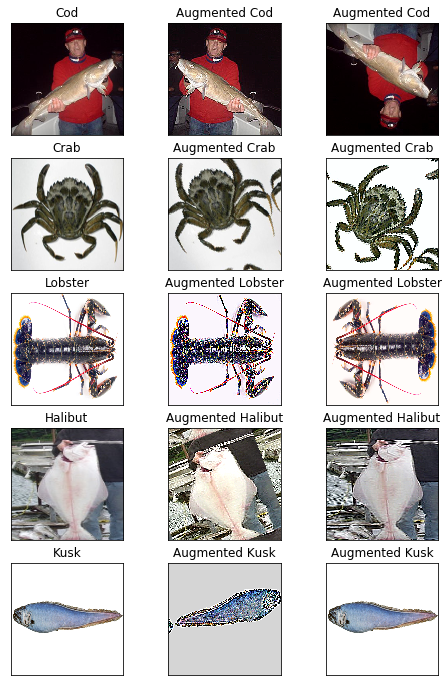

In [168]:
idx= 10
fig, ax = plt.subplots(figsize=(8,12))

plt.subplot(5, 3, 1)
plt.imshow(kfold_data[0][0][0*temp + idx])
plt.xticks([])
plt.yticks([])
plt.title('Cod')


plt.subplot(5, 3, 2)
plt.imshow(kfold_data[0][0][1*temp + idx])
plt.xticks([])
plt.yticks([])
plt.title('Augmented Cod')

plt.subplot(5, 3, 3)
plt.imshow(kfold_data[0][0][2*temp + idx])
plt.xticks([])
plt.yticks([])
plt.title('Augmented Cod')

idx= 17

plt.subplot(5, 3, 4)
plt.imshow(kfold_data[0][0][0*temp + idx])
plt.xticks([])
plt.yticks([])
plt.title('Crab')


plt.subplot(5, 3, 5)
plt.imshow(kfold_data[0][0][1*temp + idx])
plt.xticks([])
plt.yticks([])
plt.title('Augmented Crab')

plt.subplot(5, 3, 6)
plt.imshow(kfold_data[0][0][2*temp + idx])
plt.xticks([])
plt.yticks([])
plt.title('Augmented Crab')

idx= 24

plt.subplot(5, 3, 7)
plt.imshow(kfold_data[0][0][0*temp + idx])
plt.xticks([])
plt.yticks([])
plt.title('Lobster')


plt.subplot(5, 3, 8)
plt.imshow(kfold_data[0][0][1*temp + idx])
plt.xticks([])
plt.yticks([])
plt.title('Augmented Lobster')

plt.subplot(5, 3, 9)
plt.imshow(kfold_data[0][0][2*temp + idx])
plt.xticks([])
plt.yticks([])
plt.title('Augmented Lobster')

idx = 206

plt.subplot(5, 3, 10)
plt.imshow(kfold_data[0][0][0*temp + idx])
plt.xticks([])
plt.yticks([])
plt.title('Halibut')


plt.subplot(5, 3, 11)
plt.imshow(kfold_data[0][0][1*temp + idx])
plt.xticks([])
plt.yticks([])
plt.title('Augmented Halibut')

plt.subplot(5, 3, 12)
plt.imshow(kfold_data[0][0][2*temp + idx])
plt.xticks([])
plt.yticks([])
plt.title('Augmented Halibut')


idx = 215

plt.subplot(5, 3, 13)
plt.imshow(kfold_data[0][0][0*temp + idx])
plt.xticks([])
plt.yticks([])
plt.title('Kusk')


plt.subplot(5, 3, 14)
plt.imshow(kfold_data[0][0][1*temp + idx])
plt.xticks([])
plt.yticks([])
plt.title('Augmented Kusk')

plt.subplot(5, 3, 15)
plt.imshow(kfold_data[0][0][2*temp + idx])
plt.xticks([])
plt.yticks([])
plt.title('Augmented Kusk')


plt.savefig('image_augmentation.jpg')
plt.show()


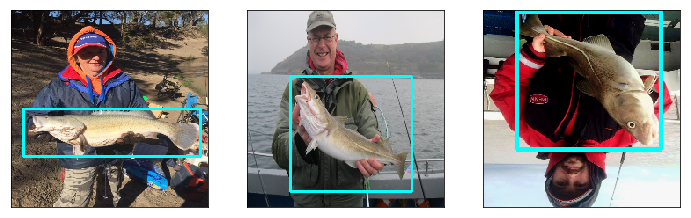

In [319]:
fig, ax = plt.subplots(figsize=(12,15))



plt.subplot(1, 3, 1)
idx = 10
pt1 = (int(all_bboxes[idx][0]),int(all_bboxes[idx][1]))
pt2 = (int(all_bboxes[idx][2]),int(all_bboxes[idx][3]))
img = cv2.rectangle(all_images[idx],pt1,pt2,(0,255,255),thickness=2)
pil_im = Image.fromarray(img)
plt.imshow(pil_im)
plt.xticks([])
plt.yticks([])

plt.subplot(1, 3, 2)
idx = 602
pt1 = (int(all_bboxes[idx][0]),int(all_bboxes[idx][1]))
pt2 = (int(all_bboxes[idx][2]),int(all_bboxes[idx][3]))
img = cv2.rectangle(all_images[idx],pt1,pt2,(0,255,255),thickness=2)
pil_im = Image.fromarray(img)
plt.imshow(pil_im)
plt.xticks([])
plt.yticks([])

plt.subplot(1, 3, 3)
idx = 4008
pt1 = (int(all_bboxes[idx][0]),int(all_bboxes[idx][1]))
pt2 = (int(all_bboxes[idx][2]),int(all_bboxes[idx][3]))
img = cv2.rectangle(all_images[idx],pt1,pt2,(0,255,255),thickness=2)
pil_im = Image.fromarray(img)
plt.imshow(pil_im)
plt.xticks([])
plt.yticks([])

plt.savefig('axis_aligned_bounding_boxes.jpg')
plt.show()

In [181]:
pt2

(128, 170)